# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [6]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [17]:
# Read the Mapbox API key
load_dotenv("API.env")
map_box_api = os.getenv("Mapbox")

## Load Data

In [18]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [19]:
# renaming columns for estetics 
sfo_data.rename(columns = {'year':"Year",'neighborhood':"Neighborhood",'sale_price_sqr_foot':"Sale Price Per SqFT",'housing_units':"Housing Units",'gross_rent':"Gross Rent"},inplace=True)
sfo_data

,Neighborhood,Sale Price Per SqFT,Housing Units,Gross Rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [20]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_housing_units = sfo_data.groupby(by="year")['Housing Units'].mean()
mean_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: Housing Units, dtype: int64

In [27]:
# Save the dataframe as a csv file
mean_housing_units.to_csv('Average Housing Units Per Year.csv')

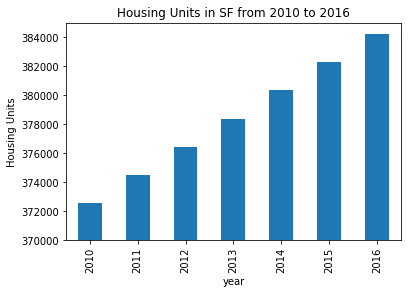

In [28]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
mean_housing_units.plot.bar(ylim = (370000,385000),title="Housing Units in SF from 2010 to 2016", xlabel='year', ylabel='Housing Units', )


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [29]:
# Calculate the average sale price per square foot and average gross rent
Average_ppf_gr = sfo_data.groupby(by="year")['Sale Price Per SqFT','Gross Rent'].mean()
Average_ppf_gr.to_csv('Average Housing Cost Per Year.csv')
Average_ppf_gr

,Sale Price Per SqFT,Gross Rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


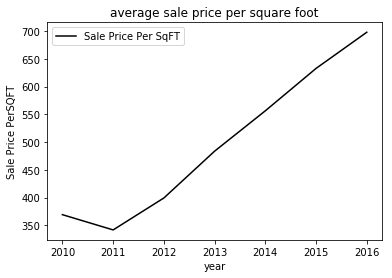

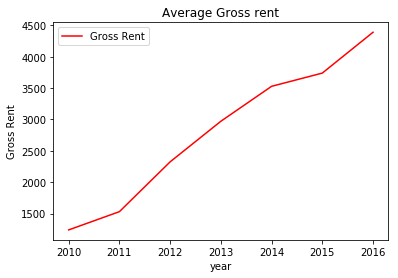

In [30]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
Average_ppf_gr.plot.line(y='Sale Price Per SqFT',title="average sale price per square foot",ylabel= "Sale Price PerSQFT",color="black")


# Line chart for average montly rent
Average_ppf_gr.plot.line(y='Gross Rent',title="Average Gross rent",ylabel= "Gross Rent",color="red")

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [32]:
# Group by year and neighborhood and then create a new dataframe of the mean values
NM=sfo_data.groupby([sfo_data.index, "Neighborhood"]).mean()
NM.to_csv('Average Prices by Neighborhood.csv')
NM.head()

Sale Price Per SqFT  Housing Units  Gross Rent
year Neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [33]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
NM.hvplot.line( x="year", y="Sale Price Per SqFT", xlabel="Year", ylabel=" Sales Price per SqFT", groupby="Neighborhood" )


:DynamicMap   [Neighborhood]
   :Curve   [year]   (Sale Price Per SqFT)

In [34]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
NM.hvplot.line( x="year", y="Gross Rent", xlabel="Year", ylabel="Average Monthly Rent", groupby="Neighborhood" )

:DynamicMap   [Neighborhood]
   :Curve   [year]   (Gross Rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [54]:
# Getting the data from the top 10 expensive neighborhoods to own
Top_10 =sfo_data.groupby(by="Neighborhood").mean().sort_values("Sale Price Per SqFT", ascending=False)

Top_10_Plot.to_csv('Top 10 Most Expensive Neighborhoods.csv')
Top_10_Plot = Top_10.head(10)

In [37]:
# Plotting the data from the top 10 expensive neighborhoods
Top_10_Plot.hvplot.bar( x="Neighborhood", y="Sale Price Per SqFT", xlabel="Year", ylabel="Sales Price per SqFT", rot=90)

:Bars   [Neighborhood]   (Sale Price Per SqFT)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [39]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
NM=sfo_data.groupby([sfo_data.index, "Neighborhood"]).mean()
NM.head()

Sale Price Per SqFT  Housing Units  Gross Rent
year Neighborhood                                                    
2010 Alamo Square               291.182945         372560        1239
     Anza Vista                 267.932583         372560        1239
     Bayview                    170.098665         372560        1239
     Buena Vista Park           347.394919         372560        1239
     Central Richmond           319.027623         372560        1239

In [40]:
NM.hvplot.bar(x="year", y=["Sale Price Per SqFT","Gross Rent"], groupby="Neighborhood" ,rot=90)

:DynamicMap   [Neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [49]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
nei_data = pd.read_csv(file_path, index_col="Neighborhood")
nei_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [50]:
# Calculate the mean values for each neighborhood
NM3=sfo_data.groupby("Neighborhood").mean()
NM3

,Sale Price Per SqFT,Housing Units,Gross Rent
Neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


In [51]:
# Join the average values with the neighborhood locations
sfo_dfs_merged = pd.DataFrame.join(nei_data, NM3)
sfo_dfs_merged=sfo_dfs_merged.dropna()
sfo_dfs_merged.to_csv("Neighborhood Map Data.csv")
sfo_dfs_merged

,Lat,Lon,Sale Price Per SqFT,Housing Units,Gross Rent
Neighborhood,,,,,
Alamo Square,37.791012,-122.402100,366.020712,378401.00,2817.285714
Anza Vista,37.779598,-122.443451,373.382198,379050.00,3031.833333
Bayview,37.734670,-122.401060,204.588623,376454.00,2318.400000
Bayview Heights,37.728740,-122.410980,590.792839,382295.00,3739.000000
Buena Vista Park,37.768160,-122.439330,452.680591,378076.50,2698.833333
...,...,...,...,...,...
West Portal,37.740260,-122.463880,498.488485,376940.75,2515.500000
Western Addition,37.792980,-122.435790,307.562201,377427.50,2555.166667
Westwood Highlands,37.734700,-122.456854,533.703935,376454.00,2250.500000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

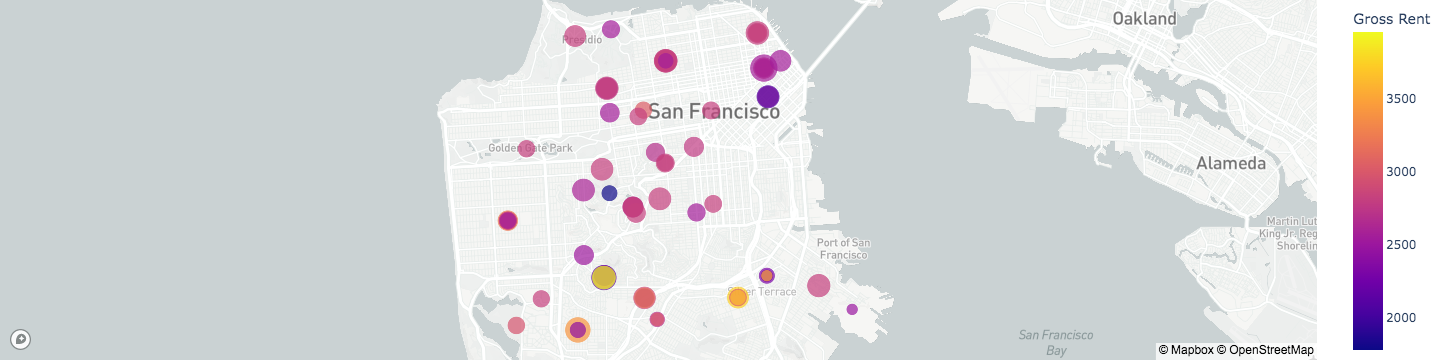

In [53]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    sfo_dfs_merged,
    lat="Lat",
    lon="Lon",
    size="Sale Price Per SqFT",
    color='Gross Rent',
    zoom=11,
    hover_name=sfo_dfs_merged.index
)
map_plot.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map_plot.show()

- - -